In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Read in the geodata

In [2]:
USstates = gpd.read_file('../data/geopandas/usa-states-census-2014.shp')
UScounties = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

Example drawings of states and counties

<AxesSubplot:>

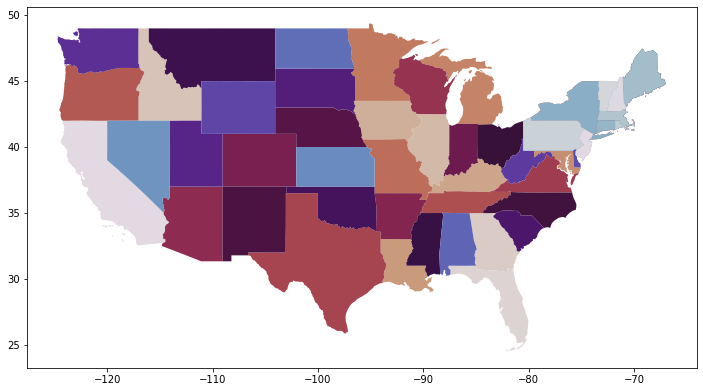

In [3]:
USstates.plot(cmap='twilight_r', figsize=(12, 12))

<AxesSubplot:>

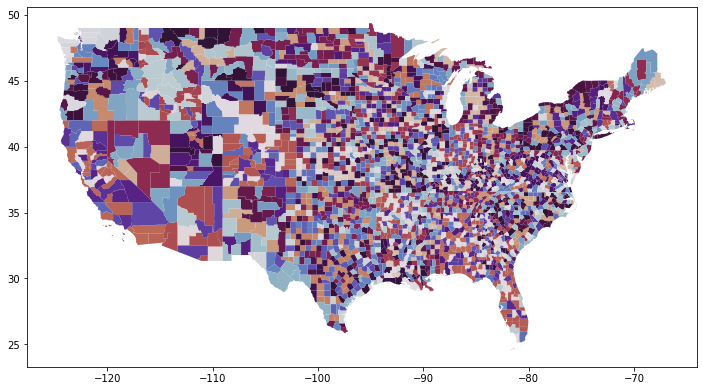

In [4]:
# Make sure the "id" column is an integer
UScounties.id = UScounties.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
UScounties = UScounties[~UScounties.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
UScounties.plot(cmap='twilight_r', figsize=(12,12))

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [6]:
world['iso_a3'][0:30]

0     FJI
1     TZA
2     ESH
3     CAN
4     USA
5     KAZ
6     UZB
7     PNG
8     IDN
9     ARG
10    CHL
11    COD
12    SOM
13    KEN
14    SDN
15    TCD
16    HTI
17    DOM
18    RUS
19    BHS
20    FLK
21    -99
22    GRL
23    ATF
24    TLS
25    ZAF
26    LSO
27    MEX
28    URY
29    BRA
Name: iso_a3, dtype: object

In [7]:
df_world = pd.read_csv('../data/final_with_states.csv')
df_world

,valid_id,date,full_name,country,lon,lat,followers,retweets,replies,likes,quotes,coordinates,name,admin1,admin2,score
0,1249933360375480320,2020-04-14T05:31:50.000Z,"Zürich, Schweiz",CH,8.531600,47.384600,6462,0,0,1,0,"(47.3846, 8.5316)",Zuerich (Kreis 5) / Gewerbeschule,Zurich,Bezirk Zuerich,-0.050000
1,1249934504543870978,2020-04-14T05:36:23.000Z,"Ibadan, Nigeria",NG,3.916700,7.396400,593,0,0,0,0,"(7.3964, 3.9167)",Ibadan,Oyo,NaN,0.000000
2,1249936139911192576,2020-04-14T05:42:53.000Z,"Jaipur, India",IN,75.816700,26.916700,691,0,0,1,0,"(26.9167, 75.8167)",Jaipur,Rajasthan,Jaipur,0.100000
3,1249937561083990016,2020-04-14T05:48:31.000Z,"हिसार, भारत",IN,75.729194,29.143703,133,0,0,0,0,"(29.1437033, 75.7291944)",Hisar,Haryana,Hisar,-0.300000
4,1249938467661938688,2020-04-14T05:52:08.000Z,"Colina, Chile",CL,-70.655763,-33.181437,53,0,0,0,0,"(-33.18143675, -70.65576307)",Chicureo Abajo,Santiago Metropolitan,Provincia de Chacabuco,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392607,1462570347790802951,2021-11-21T23:55:18.000Z,"Corvallis, OR",US,-123.264417,44.587813,268,0,0,0,0,"(44.58781347, -123.26441691)",Corvallis,Oregon,Benton County,0.400000
392608,1462585007503855621,2021-11-22T00:53:33.000Z,"Varennes, Québec",CA,-73.479357,45.667751,1576,0,0,0,0,"(45.6677507, -73.47935661)",Montreal-Est,Quebec,NaN,0.156818
392609,1462592006216159234,2021-11-22T01:21:22.000Z,"Ashland, VA",US,-77.468255,37.754710,626,0,0,0,0,"(37.75470973, -77.46825546)",Ashland,Virginia,Hanover County,0.000000
392610,1462594688989507584,2021-11-22T01:32:02.000Z,"Kentucky, USA",US,-84.484544,38.092900,89,0,0,0,0,"(38.09289955, -84.48454382)",Lexington-Fayette,Kentucky,Fayette County,1.000000


In [8]:
import pycountry
tweetsCountry = df_world.value_counts('country')
tweetsCountry.index

Index(['US', 'GB', 'CA', 'IN', 'AU', 'ZA', 'PH', 'NG', 'IE', 'MY',
       ...
       'NF', 'TM', 'MS', 'FM', 'FK', 'TF', 'NU', 'CK', 'TJ', 'GA'],
      dtype='object', name='country', length=220)

In [9]:
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3

# The only non existing is kosovo, which is registered as -99
a3_codes = [countries.get(country, '-99') for country in tweetsCountry.index]

In [10]:
counts = pd.DataFrame([a3_codes, tweetsCountry]).T
counts.columns = ['iso_a3', 'NumberOfTweets']

In [11]:
result = world.merge(counts, on='iso_a3')

<BarContainer object of 13 artists>

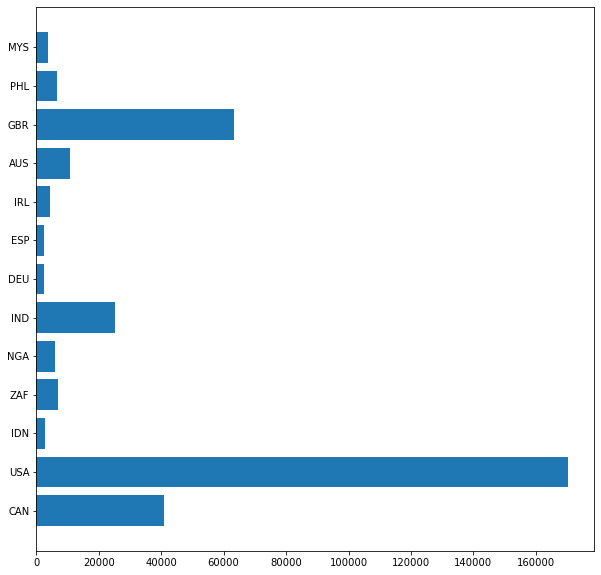

In [12]:
plt.figure(figsize=(10,10))
temp = result.loc[result['NumberOfTweets'] > 2500]
plt.barh(temp['iso_a3'], temp['NumberOfTweets'])

C:\Users\skuil\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


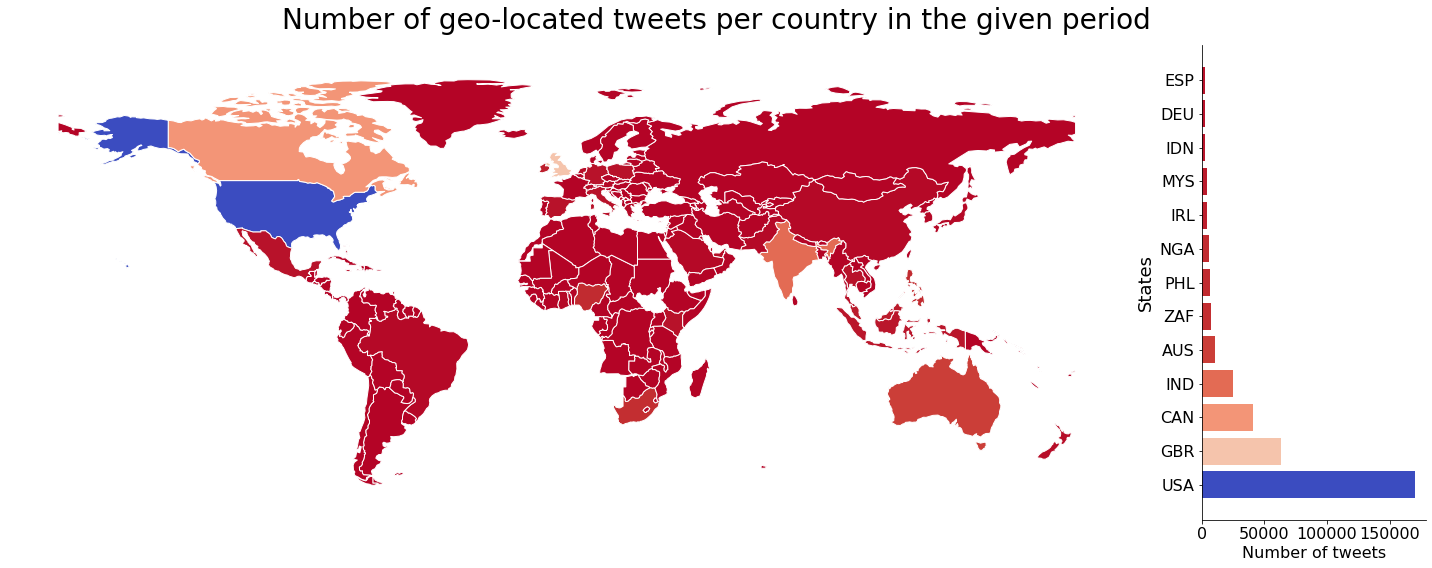

In [13]:
fig, (axis1, axis2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(20,8))
my_cmap = plt.cm.get_cmap('coolwarm_r')

temp = result.sort_values('NumberOfTweets', ascending=False)

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
colors = my_cmap(rescale(temp['NumberOfTweets'].to_list()))

temp.plot(figsize=(22, 8), column='NumberOfTweets', color=colors, edgecolor='white', ax=axis1)
axis1.axis('off')

# Draw the barchart
axis2.barh(temp['iso_a3'][0:13], temp['NumberOfTweets'][0:13], color=colors[0:13])
axis2.set_ylabel('States', fontsize=18)
axis2.set_xlabel('Number of tweets', fontsize=18)
axis2.set_xlabel('Number of tweets', fontsize=16)
axis2.tick_params(which='major', labelsize=16)
axis2.spines['right'].set_visible(False)
axis2.spines['top'].set_visible(False)

fig.suptitle('Number of geo-located tweets per country in the given period', fontsize=28)
plt.tight_layout()

Read in the data of the project

In [14]:
df = pd.read_csv('../data/FINAL.csv')
print(len(df))
df = df.loc[df['country'] == 'US', :].reset_index()
print(len(df))

170207
170207


Add the mean score to the data

In [15]:
#  Select the number of tweets from the dataset
drawing_data = {}
for name in df['States'].unique():
    subsub = df.loc[df['States'] == name]
    drawing_data[name] = len(subsub)

# Add it per state to the dataframe
ll = []
for name in USstates['NAME']:
    ll.append(drawing_data[name])
USstates['NumberOfTweets'] = ll

# Show the dataframe
USstates.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,NumberOfTweets
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",33360
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",4553
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",11056
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",5916
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",427


In [16]:
# Sort based on the number of tweets
USstates = USstates.sort_values('NumberOfTweets', ascending=False)
USstates.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,NumberOfTweets
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",33360
13,36,01779796,0400000US36,36,NY,New York,00,122054577774,19242052501,Northeast,"MULTIPOLYGON Z (((-72.01893 41.27411 0.00000, ...",28237
49,36,01779796,0400000US36,36,NY,New York,00,122054577774,19242052501,Northeast,"MULTIPOLYGON Z (((-72.01893 41.27411 0.00000, ...",28237
16,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,Southwest,"POLYGON Z ((-106.62345 31.91403 0.00000, -106....",11111
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",11056


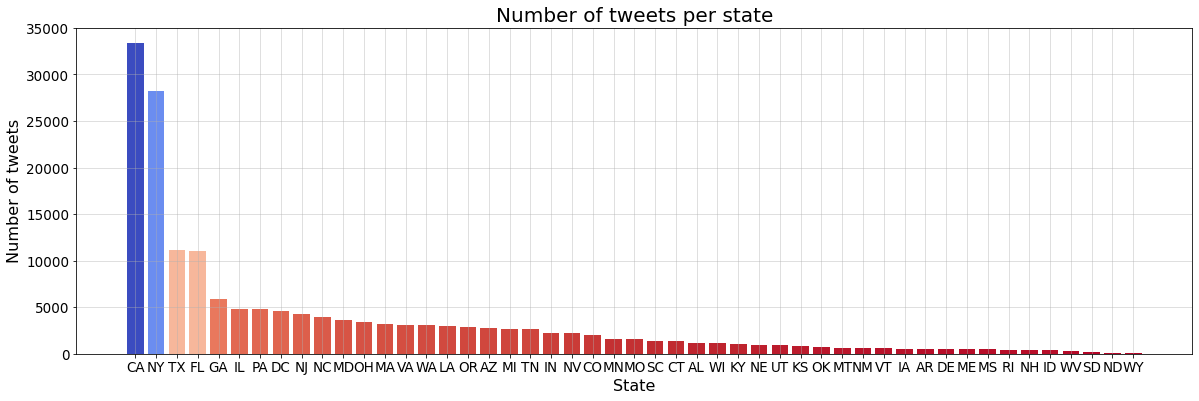

In [17]:
fig, axis = plt.subplots(figsize=(20, 6))
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
axis.bar(USstates['STUSPS'], USstates['NumberOfTweets'], color=my_cmap(rescale(USstates['NumberOfTweets'])))
axis.set_title('Number of tweets per state', fontsize=20)
axis.set_ylabel('Number of tweets', fontsize=16)
axis.set_xlabel('State', fontsize=16)
axis.tick_params(axis='both', labelsize=13.5)

axis.grid(alpha=0.5)


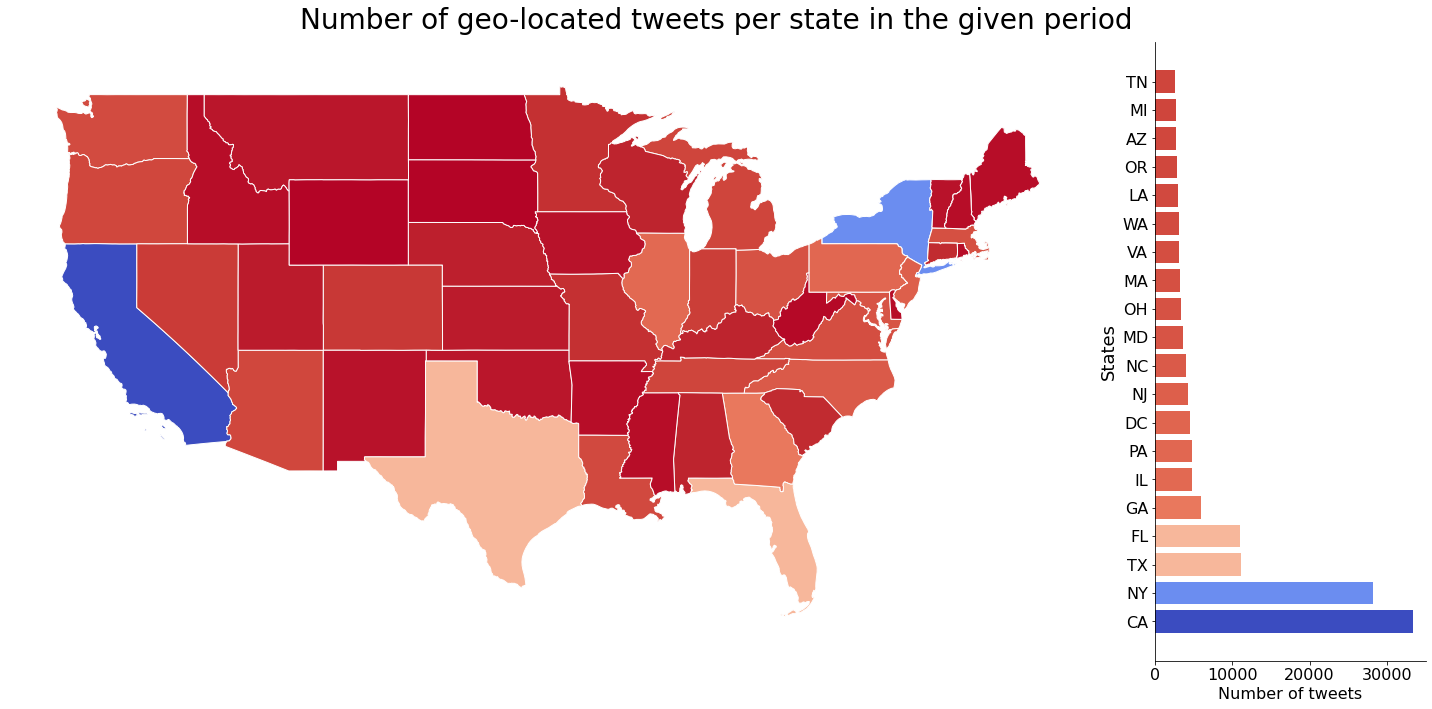

In [18]:
fig, (axis1, axis2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(20,10))

my_cmap = plt.cm.get_cmap('coolwarm_r')
# colors = my_cmap(data_color_normalized)

# Draw the map
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
# USstates.boundary.plot(color='white')
USstates.plot(figsize=(22, 8), column='NumberOfTweets', cmap=my_cmap, edgecolor='white', ax=axis1)
axis1.axis('off')
colors = my_cmap(rescale(USstates['NumberOfTweets']))

# Draw the barchart
axis2.barh(USstates['STUSPS'][0:24], USstates['NumberOfTweets'][0:24], color=colors[0:24])
axis2.set_ylabel('States', fontsize=18)
axis2.set_xlabel('Number of tweets', fontsize=18)
axis2.set_xlabel('Number of tweets', fontsize=16)
axis2.tick_params(which='major', labelsize=16)
axis2.spines['right'].set_visible(False)
axis2.spines['top'].set_visible(False)

# Create title
fig.suptitle('Number of geo-located tweets per state in the given period', fontsize=28)
plt.tight_layout()


add number of tweets to the dataset

In [19]:
df = df.drop(['index', 'Unnamed: 0'], axis=1)

In [20]:
df2 = df.loc[df['States'].isin(['California', 'New York', 'Texas', 'Georgia', 'Florida'])]
df2['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df2 = df2.set_index('date')
df2

C:\Users\skuil\AppData\Local\Temp/ipykernel_13012/2566682404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


,valid_id,country,admin1,admin2,lon,lat,followers,retweets,replies,likes,quotes,score,States,Counties
date,,,,,,,,,,,,,,
2020-04-14 05:52:44+00:00,1249938618497597441,US,California,Riverside County,-117.566000,33.875300,164,0,0,1,0,0.136364,California,Riverside County
2020-04-14 10:47:40+00:00,1250012844126543874,US,Florida,Escambia County,-87.209300,30.437000,41,0,0,0,0,-0.125000,Florida,Escambia County
2020-04-14 10:51:22+00:00,1250013775266287617,US,New York,Kings County,-73.906720,40.653221,365,0,0,0,0,0.000000,New York,NaN
2020-04-14 10:58:08+00:00,1250015478455525377,US,New York,NaN,-74.006400,40.714200,665,0,0,0,0,0.136364,New York,New York County
2020-04-14 11:38:19+00:00,1250025588578045953,US,California,Los Angeles County,-118.244500,34.056400,3792,0,0,1,0,0.000000,California,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-21 21:24:51+00:00,1462532483816194054,US,Florida,Alachua County,-82.354930,29.643632,185,0,0,0,0,0.500000,Florida,Alachua County
2021-11-21 22:21:16+00:00,1462546682449596423,US,New York,Orange County,-74.292052,41.226254,282,0,0,0,0,0.483333,New York,Orange County
2021-11-21 23:04:48+00:00,1462557637887729666,US,California,Riverside County,-117.542522,33.864387,419,0,0,0,0,0.142857,California,Riverside County


In [21]:
from datetime import timedelta

selected_states = {
    'Texas':None,
    'New York':None,
    'California':None,
    'Florida':None,
    'Georgia':None
}
df2 = df2.loc[
        df2.index < pd.to_datetime('2021-10-31', utc=True)
    ]
for state in selected_states.keys():
    selected_states[state] = df2.loc[df2['States'] == state]['score'].resample('M').mean()
    selected_states[state].index = selected_states[state].index - timedelta(days=30)


In [22]:
selected_states

{'Texas': date
 2020-03-01 00:00:00+00:00    0.096767
 2020-03-31 00:00:00+00:00    0.124487
 2020-05-01 00:00:00+00:00    0.167029
 2020-05-31 00:00:00+00:00    0.120350
 2020-07-01 00:00:00+00:00    0.144909
 2020-08-01 00:00:00+00:00    0.160253
 2020-08-31 00:00:00+00:00    0.159959
 2020-10-01 00:00:00+00:00    0.134906
 2020-10-31 00:00:00+00:00    0.156847
 2020-12-01 00:00:00+00:00    0.154118
 2021-01-01 00:00:00+00:00    0.152641
 2021-01-29 00:00:00+00:00    0.133075
 2021-03-01 00:00:00+00:00    0.140904
 2021-03-31 00:00:00+00:00    0.125005
 2021-05-01 00:00:00+00:00    0.189714
 2021-05-31 00:00:00+00:00    0.139699
 2021-07-01 00:00:00+00:00    0.082033
 2021-08-01 00:00:00+00:00    0.086578
 2021-08-31 00:00:00+00:00    0.087132
 2021-10-01 00:00:00+00:00    0.119946
 Name: score, dtype: float64,
 'New York': date
 2020-03-01 00:00:00+00:00    0.124732
 2020-03-31 00:00:00+00:00    0.091197
 2020-05-01 00:00:00+00:00    0.058610
 2020-05-31 00:00:00+00:00    0.119434
 

In [23]:
covidUS = pd.read_csv('../data/data_table_for_daily_case_trends__the_united_states.csv')
covidUS['Cases'] = covidUS['New Cases'] + covidUS['Historic Cases']
covidUS = covidUS.drop(['New Cases', 'Historic Cases'], axis=1)
covidUS['Date'] = pd.to_datetime(covidUS['Date'], format='%b %d %Y', utc=True)
covidUS = covidUS.set_index('Date')
covidUS = covidUS.loc[
        (covidUS.index > pd.to_datetime('2020-03-01', utc=True)) &
        (covidUS.index < pd.to_datetime('2021-10-31', utc=True))
    ]
covidUS = covidUS.resample('W').sum()
covidUS

,Cases
Date,
2020-03-08 00:00:00+00:00,735
2020-03-15 00:00:00+00:00,6519
2020-03-22 00:00:00+00:00,44171
2020-03-29 00:00:00+00:00,122019
2020-04-05 00:00:00+00:00,189329
...,...
2021-10-03 00:00:00+00:00,736079
2021-10-10 00:00:00+00:00,662643
2021-10-17 00:00:00+00:00,566228


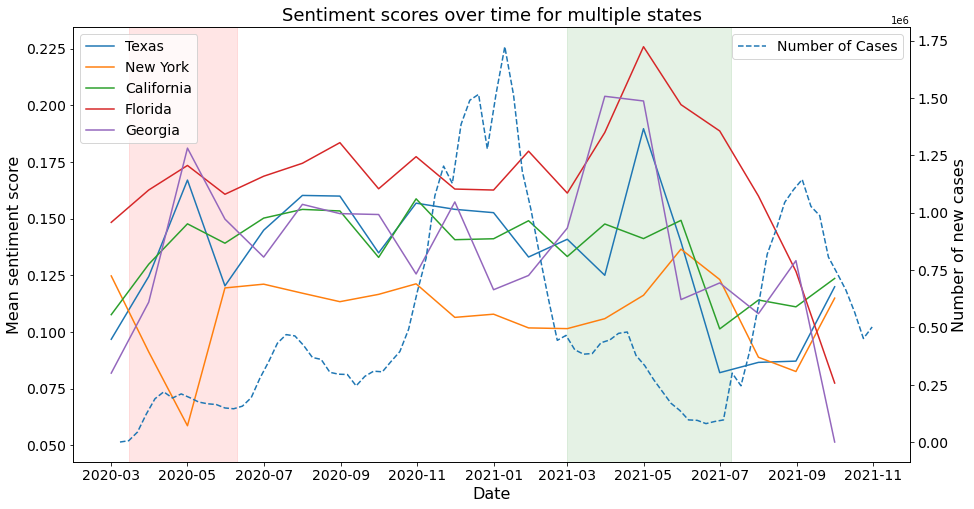

In [24]:
# fig, axis = plt.subplots(1, 1, gridspec_kw={'width_ratios': [4, 1]}, figsize=(20,10))
fig, axis = plt.subplots(1, 1, figsize=(15,8))
axisCovid = axis.twinx()
for state in selected_states.keys():
    axis.plot(selected_states[state], label=state)
axisCovid.plot(covidUS['Cases'], label='Number of Cases', linestyle="--")

axisCovid.legend(fontsize=14)
axis.legend(loc='upper left', fontsize=14)

axis.axvspan(pd.to_datetime('2020-03-15', utc=True), pd.to_datetime('2020-06-10', utc=True), alpha=0.1, color='red')
axis.axvspan(pd.to_datetime('2021-03-01', utc=True), pd.to_datetime('2021-07-10', utc=True), alpha=0.1, color='green')

axis.set_title('Sentiment scores over time for multiple states', fontsize=18)
axis.set_xlabel('Date', fontsize=16)
axis.set_ylabel('Mean sentiment score', fontsize=16)
axisCovid.set_ylabel('Number of new cases', fontsize=16)
axis.tick_params(which='major', labelsize=14)
axisCovid.tick_params(which='major', labelsize=14)



In [35]:
UScounties['County'] = UScounties['NAME'] + ' ' + UScounties['LSAD']

In [99]:
new_df['Counties'].value_counts()

New York County          15492
Nassau County             1642
Suffolk County             789
Westchester County         711
Erie County                457
Monroe County              277
Albany County              180
Oneida County              156
Onondaga County            143
Delaware County            133
Dutchess County            133
Orange County              122
Ulster County              116
Rensselaer County          113
Rockland County             72
Herkimer County             67
Columbia County             61
Saratoga County             56
Niagara County              46
Tompkins County             42
Sullivan County             32
Warren County               28
Greene County               28
Schenectady                 25
Broome County               25
Otsego County               24
Essex County                21
Putnam County               20
Madison County              18
Chemung County              18
Chautauqua County           18
Ontario County              16
Cattarau

In [119]:
# Make selection of counties
county_result = {}
selected_counties = {}

for county in ['New York', 'California']:
    new_df = df.loc[df['States'] == county]
    selected_counties[county] = new_df['Counties'].value_counts()[new_df['Counties'].value_counts() > 150].index.to_list()
    # new_df = new_df.loc[new_df['Counties'].isin(selected_counties)]
    scores = new_df.groupby('Counties')['score'].mean().reset_index()
    scores['County'] = scores['Counties']

    # print(scores)
    # result = world.merge(scores, on='iso_a3')
    if county == 'New York':
        number = '36'
    else:
        number= '06'
    subUScounties = UScounties.loc[UScounties['STATE'] == number]
    county_result[county] = subUScounties.merge(scores[['County', 'score']], on='County')

{'New York': ['New York County', 'Nassau County', 'Suffolk County', 'Westchester County', 'Erie County', 'Monroe County', 'Albany County', 'Oneida County'], 'California': ['Los Angeles County', 'Riverside County', 'Orange County', 'San Francisco', 'San Diego County', 'Santa Clara County', 'Alameda County', 'Sacramento County', 'San Bernardino County', 'Contra Costa County', 'Ventura County', 'San Mateo County', 'Sonoma County', 'Monterey County', 'Santa Barbara County', 'Santa Cruz County', 'Fresno County', 'Kern County', 'Placer County', 'San Luis Obispo County', 'Marin County']}


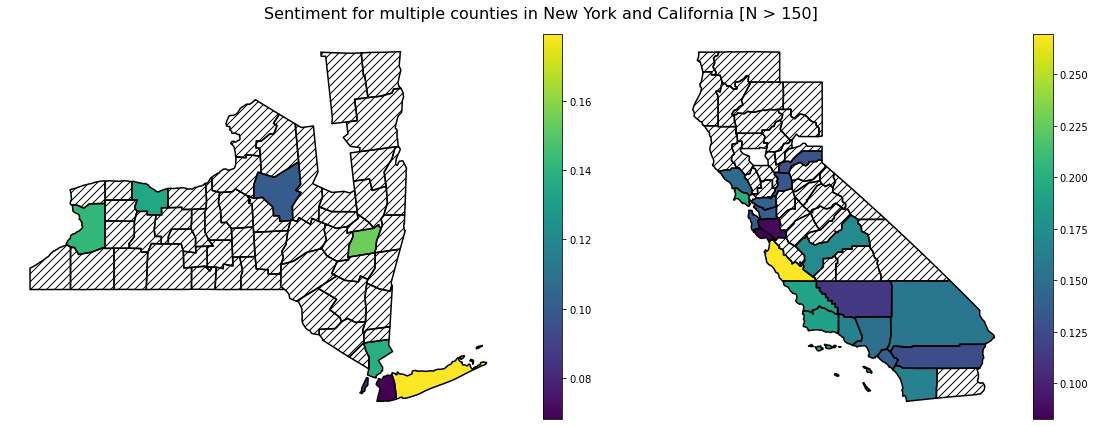

In [132]:
fig, (axis1, axis2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [7, 5]}, figsize=(16,6))
print(selected_counties)

county_result['New York'].boundary.plot(color='black', ax=axis1)
county_result['New York'].loc[county_result['New York']['County'].isin(selected_counties['New York'])].plot(column='score', legend=True, ax=axis1)
county_result['New York'].loc[~county_result['New York']['County'].isin(selected_counties['New York'])].plot(color='white', hatch='///', legend=True, ax=axis1)

county_result['California'].boundary.plot(color='black', ax=axis2)
county_result['California'].loc[county_result['California']['County'].isin(selected_counties['California'])].plot(column='score', legend=True, ax=axis2)
county_result['California'].loc[~county_result['California']['County'].isin(selected_counties['California'])].plot(color='white', hatch='///', legend=True, ax=axis2)
# county_result.plot(column='score', legend=True, ax=axis)

axis1.axis('off')
axis2.axis('off')
plt.suptitle('Sentiment for multiple counties in New York and California [N > 150]', fontsize=16)
plt.tight_layout()

In [140]:
subdf = df.loc[df['Counties'] == 'New York County']
subdf['date'] = pd.to_datetime(subdf['date'], format='%Y-%m-%d')
subdf = subdf.set_index('date')
subdf.head()


C:\Users\skuil\AppData\Local\Temp/ipykernel_13012/1824023143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['date'] = pd.to_datetime(subdf['date'], format='%Y-%m-%d')


,valid_id,country,admin1,admin2,lon,lat,followers,retweets,replies,likes,quotes,score,States,Counties
date,,,,,,,,,,,,,,
2020-04-14 10:58:08+00:00,1250015478455525377,US,New York,NaN,-74.006400,40.714200,665,0,0,0,0,0.136364,New York,New York County
2020-04-14 12:27:10+00:00,1250037883353825280,US,New York,New York County,-73.952891,40.790091,313,0,0,0,0,0.000000,New York,New York County
2020-04-14 14:02:16+00:00,1250061815968604166,US,New Jersey,Hudson County,-73.989080,40.754340,4338,0,0,0,0,0.000000,New York,New York County
2020-04-14 16:23:01+00:00,1250097235397873664,US,New Jersey,Hudson County,-73.989089,40.750826,843,0,0,0,0,0.000000,New York,New York County
2020-04-14 17:27:57+00:00,1250113575709966351,US,New York,NaN,-74.006400,40.714200,3909,1,0,2,0,0.136364,New York,New York County


<AxesSubplot:xlabel='date'>

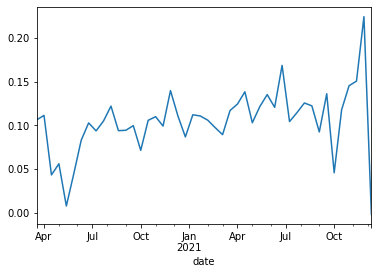

In [144]:
subdf['score'].resample('2W').mean().plot()

<AxesSubplot:>

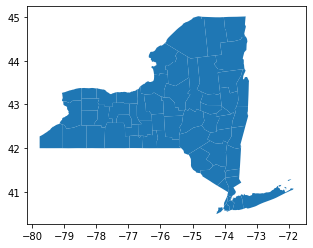

In [83]:
UScounties.loc[UScounties['STATE'] == '36'].plot()